In [1]:
from glob import glob
from astropy.io.fits import getdata
from astropy.table import Table

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('font', size=14)

In [3]:
matched_cond_files = sorted(glob('/global/cfs/cdirs/desi/users/ameisner/GFA/conditions/offline_matched_coadd_ccds_SV1-thru_*fits'))
last_file = matched_cond_files[-1]

In [4]:
# conditions = getdata(last_file, 3)
conditions = Table.read(last_file, 3)
conditions

EXPID,CUBE_INDEX,NIGHT,EXPTIME,FNAME_RAW,SKYRA,SKYDEC,PROGRAM,MOON_ILLUMINATION,MOON_ZD_DEG,MOON_SEP_DEG,KTERM,FRACFLUX_NOMINAL_POINTSOURCE,FRACFLUX_NOMINAL_ELG,FRACFLUX_NOMINAL_BGS,MJD,FWHM_ASEC,TRANSPARENCY,SKY_MAG_AB,FIBER_FRACFLUX,FIBER_FRACFLUX_ELG,FIBER_FRACFLUX_BGS,AIRMASS,RADPROF_FWHM_ASEC,FIBERFAC,FIBERFAC_ELG,FIBERFAC_BGS,MINCONTRAST,MAXCONTRAST
int64,int64,int64,float64,bytes90,float64,float64,bytes88,float64,float64,float64,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
67678,-1,20201214,5.0,/global/cfs/cdirs/desi/spectro/data/20201214/00067678/guide-00067678.fits.fz,18.402171,28.33932,"Dither fibermode undithered tile 80254 (18.4, 28.34)",0.0024136893066918786,107.18208872228597,116.96543502556636,0.114,0.58176816,0.42423388,0.19544029,59198.08855637566,2.3493915528589158,0.9421358004271907,20.306343899519227,0.19900321323987505,0.17021433862582147,0.08731190503654784,1.0245214875180846,2.350510493431641,0.3130178868504,0.3658351730636306,0.4066348952572144,5.780865901633678,10.919393731772706
67679,-1,20201214,5.0,/global/cfs/cdirs/desi/spectro/data/20201214/00067679/guide-00067679.fits.fz,18.401879,28.33935,"Dither fibermode tile 80255 (18.4, 28.34)",0.002470077491515754,108.53487794245974,116.90106070172283,0.114,0.58176816,0.42423388,0.19544029,59198.09340272179,2.8709763698441533,0.9031746394430591,20.253945455193083,0.1438643037081487,0.12788595792381927,0.06783484635577632,1.0191465895617893,2.892360974200872,0.21278611771800762,0.2589702593246827,0.2989076961235342,5.1214083666519565,9.350706664683182
67680,-1,20201214,5.0,/global/cfs/cdirs/desi/spectro/data/20201214/00067680/guide-00067680.fits.fz,18.401592,28.33939,"Dither fibermode tile 80256 (18.4, 28.34)",0.0025285648130003104,109.91266545656522,116.83665325362135,0.114,0.58176816,0.42423388,0.19544029,59198.09831583536,2.183973198109514,0.9527972869199486,20.033265558674195,0.2233190296066644,0.1882277083578398,0.09541835438566751,1.01446950715555,2.1858304453547186,0.35466929576625844,0.40983996645546883,0.45014006425860387,6.912664743944841,11.400930579615778
67681,-1,20201214,5.0,/global/cfs/cdirs/desi/spectro/data/20201214/00067681/guide-00067681.fits.fz,18.401321,28.33941,"Dither fibermode tile 80257 (18.4, 28.34)",0.002586841415263611,111.28808981011574,116.7722856944986,0.114,0.58176816,0.42423388,0.19544029,59198.10320283822,2.2193172453875247,0.9507191598338869,20.218061565792368,0.21753110882666993,0.18361133227018722,0.09324966258742107,1.0105723623262,2.215289339585487,0.338552050890902,0.39312203446406907,0.43481803197640556,5.7981510083153855,10.881645965008259
67682,-1,20201214,5.0,/global/cfs/cdirs/desi/spectro/data/20201214/00067682/guide-00067682.fits.fz,18.40105,28.33944,"Dither fibermode tile 80258 (18.4, 28.34)",0.0026464128372219306,112.6723796158372,116.70784632768324,0.114,0.58176816,0.42423388,0.19544029,59198.10810292036,1.984629969729699,0.9562083786822335,20.202504822354022,0.25794325402393914,0.21256344979063546,0.10600711476766109,1.0074075191686402,1.996520829970103,0.402763584032106,0.4557867416747298,0.49478774939103576,7.134241450154704,9.513370524988101
67683,-1,20201214,5.0,/global/cfs/cdirs/desi/spectro/data/20201214/00067683/guide-00067683.fits.fz,18.400792,28.33946,"Dither fibermode tile 80259 (18.4, 28.34)",0.0027061714474315296,114.05922679811383,116.64347353049872,0.114,0.58176816,0.42423388,0.19544029,59198.11299549536,1.958987337182022,0.9593816691164547,20.211071197447247,0.2649491636904652,0.21830013294687622,0.10868444005060338,1.004978924380468,2.018252801123949,0.41983935735119454,0.4752340314012261,0.5136904412518454,6.413245143751067,9.70981733778816
67684,-1,20201214,5.0,/global/cfs/cdirs/desi/spectro/data/20201214/00067684/guide-00067684.fits.fz,18.400542,28.33947,"Dither fibermode tile 80260 (18.4, 28.34)",0.002766926709432882,115.45158421774033,116.57906495348581,0.114,0.58176816,0.42423388,0.19544029

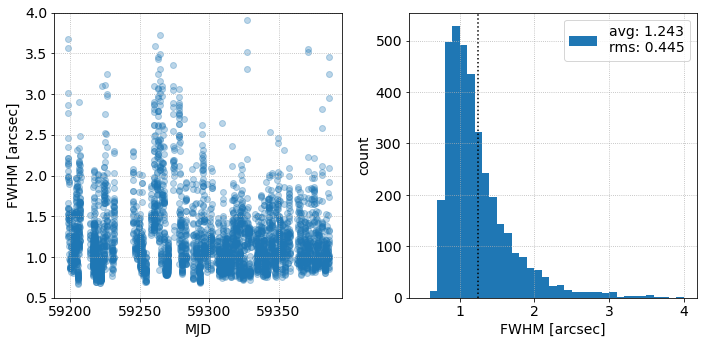

In [5]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

ax = axes[0]
ax.scatter(conditions['MJD'], conditions['FWHM_ASEC'], alpha=0.3)
ax.set(xlabel='MJD',
       ylabel='FWHM [arcsec]',
       ylim=(0.5, 4))
ax.grid(ls=':')

savg = np.average(conditions['FWHM_ASEC'])
srms = np.std(conditions['FWHM_ASEC'])

ax = axes[1]
ax.hist(conditions['FWHM_ASEC'], bins=np.linspace(0.5,4,36), label='avg: {:.3f}\nrms: {:.3f}'.format(savg, srms))
ax.axvline(savg, ls=':', color='k')
ax.set(xlabel='FWHM [arcsec]',
       ylabel='count')
ax.grid(ls=':')
ax.legend()

fig.tight_layout();

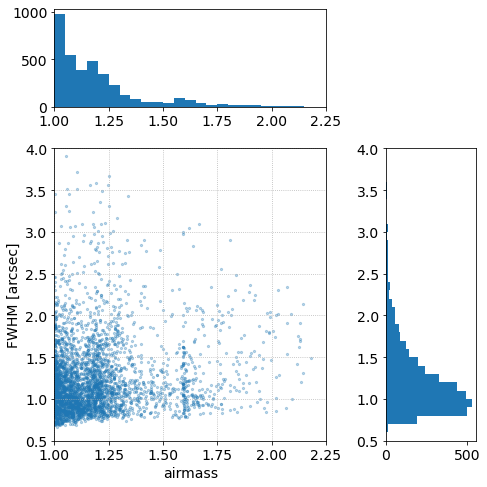

In [6]:
fig, axes = plt.subplots(2,2, figsize=(7,7), gridspec_kw={'height_ratios':[1,3], 'width_ratios':[3,1]})

ax = axes[1,0]
ax.scatter(conditions['AIRMASS'], conditions['FWHM_ASEC'], s=5, alpha=0.3)
ax.set(xlabel='airmass',
       xlim=(1, 2.25),
       ylabel='FWHM [arcsec]',
       ylim=(0.5, 4))
ax.grid(ls=':')

ax = axes[0,0]
ax.hist(conditions['AIRMASS'], bins=np.linspace(1,2.25, 26))
ax.set(xlim=(1, 2.25))

ax = axes[1,1]
ax.hist(conditions['FWHM_ASEC'], bins=np.linspace(0.5,4, 36), orientation='horizontal')
ax.set(ylim=(0.5, 4))

ax = axes[0,1]
ax.axis('off')

fig.tight_layout();

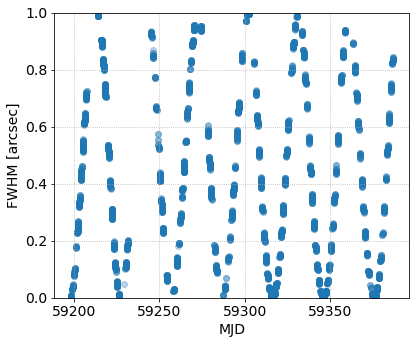

In [7]:
fig, ax = plt.subplots(1,1, figsize=(6,5))

ax.scatter(conditions['MJD'], conditions['MOON_ILLUMINATION'], alpha=0.3)
ax.set(xlabel='MJD',
       ylabel='FWHM [arcsec]',
       ylim=(0,1))
ax.grid(ls=':')

fig.tight_layout();